In [353]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
# This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [354]:
df_2015 = pd.read_csv("data/2015.csv")

In [355]:
df_2016 = pd.read_csv("data/2016.csv")

In [356]:
df_2017 = pd.read_csv("data/2017.csv")

In [357]:
df_2018 = pd.read_csv("data/2018.csv")

In [358]:
df_2019 = pd.read_csv("data/2019.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [359]:
df_2016.shape

(157, 13)

In [360]:
df_2017.shape

(155, 12)

In [361]:
df_2018.shape

(156, 9)

In [362]:
df_2019.shape

(156, 9)

In [363]:
df_2015.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [364]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [365]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [366]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [367]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [368]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [369]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [370]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [371]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [372]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [373]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [374]:
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [375]:
df_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [376]:
df_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [377]:
df_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [378]:
df_2015.describe

<bound method NDFrame.describe of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651

In [379]:
df_2016.describe

<bound method NDFrame.describe of          Country                           Region  Happiness Rank  \
0        Denmark                   Western Europe               1   
1    Switzerland                   Western Europe               2   
2        Iceland                   Western Europe               3   
3         Norway                   Western Europe               4   
4        Finland                   Western Europe               5   
..           ...                              ...             ...   
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154         Togo               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
0              7.526                      7.460            

In [380]:
df_2017.describe

<bound method NDFrame.describe of                       Country  Happiness.Rank  Happiness.Score  Whisker.high  \
0                      Norway               1            7.537      7.594445   
1                     Denmark               2            7.522      7.581728   
2                     Iceland               3            7.504      7.622030   
3                 Switzerland               4            7.494      7.561772   
4                     Finland               5            7.469      7.527542   
..                        ...             ...              ...           ...   
150                    Rwanda             151            3.471      3.543030   
151                     Syria             152            3.462      3.663669   
152                  Tanzania             153            3.349      3.461430   
153                   Burundi             154            2.905      3.074690   
154  Central African Republic             155            2.693      2.864884   

     

In [381]:
df_2018.describe

<bound method NDFrame.describe of      Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.632           1.305   
1               2                    Norway  7.594           1.456   
2               3                   Denmark  7.555           1.351   
3               4                   Iceland  7.495           1.343   
4               5               Switzerland  7.487           1.420   
..            ...                       ...    ...             ...   
151           152                     Yemen  3.355           0.442   
152           153                  Tanzania  3.303           0.455   
153           154               South Sudan  3.254           0.337   
154           155  Central African Republic  3.083           0.024   
155           156                   Burundi  2.905           0.091   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.592                    0.874   

In [382]:
df_2019.describe

<bound method NDFrame.describe of      Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986   

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [383]:
# in the kaggle page mentioned data source

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [384]:
#the dataset its from 2015-2019 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [385]:
# the dataset has same value and types

In [386]:
df_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [387]:
df_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [388]:
df_2018.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [389]:
df_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [390]:
df_columns = [df_2015.columns, df_2016.columns, df_2017.columns, df_2018.columns, df_2019.columns]
df_columns

[Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
        'Standard Error', 'Economy (GDP per Capita)', 'Family',
        'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
        'Generosity', 'Dystopia Residual'],
       dtype='object'),
 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
        'Lower Confidence Interval', 'Upper Confidence Interval',
        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Trust (Government Corruption)', 'Generosity',
        'Dystopia Residual'],
       dtype='object'),
 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
        'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
        'Health..Life.Expectancy.', 'Freedom', 'Generosity',
        'Trust..Government.Corruption.', 'Dystopia.Residual'],
       dtype='object'),
 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
        'Social support', 'Healthy life exp

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [391]:

df_2015.duplicated().sum()

0

In [392]:
df_2016.duplicated().sum()


0

In [393]:
df_2017.duplicated().sum()


0

In [394]:
df_2018.duplicated().sum()


0

In [395]:
df_2019.duplicated().sum()


0

In [396]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [397]:
df_2015.isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [398]:
df_2016.isnull().sum().sort_values(ascending = False)


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [399]:
df_2017.isnull().sum().sort_values(ascending = False)


Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [400]:
df_2018.isnull().sum().sort_values(ascending = False)

Perceptions of corruption       1
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
dtype: int64

In [401]:
df_2019.isnull().sum().sort_values(ascending = False)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [402]:
# go to clean them 

In [403]:
df_2015.rename(columns = {'Economy (GDP per Capita)': 'GDP per capita', 
                         'Health (Life Expectancy)': 'Healthy life expectancy',
                          'Trust (Government Corruption)': 'Perceptions of corruption',
                         'Family': 'Social support'
                        }, inplace = True)

df_2015.columns



Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom', 'Perceptions of corruption',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [404]:

df_2016.rename(columns = {'Economy (GDP per Capita)': 'GDP per capita',
                            'Health (Life Expectancy)': 'Healthy life expectancy',
                            'Trust (Government Corruption)': 'Perceptions of corruption',
                            'Family': 'Social support'
                            
                            }, inplace = True)
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom', 'Perceptions of corruption', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [405]:
df_2017.rename(columns = {'Happiness.Rank': 'Overall rank', 'Happiness.Score': 'Score',
                            'Economy..GDP.per.Capita.': 'GDP per capita',
                            'Health..Life.Expectancy.': 'Healthy life expectancy',
                            'Trust..Government.Corruption.': 'Perceptions of corruption',
                            'Family': 'Social support'
                            }, inplace = True)
df_2017.columns


Index(['Country', 'Overall rank', 'Score', 'Whisker.high', 'Whisker.low',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom', 'Generosity', 'Perceptions of corruption',
       'Dystopia.Residual'],
      dtype='object')

In [406]:
df_2018.rename(columns = {'Country or region': 'Country', 'Freedom to make life choices': 'Freedom','Overall rank':'Happiness Rank', 'Score':'Happiness Score'} , inplace = True)
df_2018.columns

Index(['Happiness Rank', 'Country', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [407]:
df_2019.rename(columns = {'Country or region': 'Country', 'Freedom to make life choices': 'Freedom','Overall rank':'Happiness Rank', 'Score':'Happiness Score'} , inplace = True)
df_2019.columns

Index(['Happiness Rank', 'Country', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [408]:
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

In [409]:
df_all = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], sort = False)
df_all.dropna(axis = 1, how = 'any', inplace = True)

In [410]:
cols = df_all.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_all = df_all[cols]

In [411]:
df_all.head()

,Year,Country,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity
0,2015,Switzerland,1.39651,1.34951,0.94143,0.66557,0.29678
1,2015,Iceland,1.30232,1.40223,0.94784,0.62877,0.43630
2,2015,Denmark,1.32548,1.36058,0.87464,0.64938,0.34139
3,2015,Norway,1.45900,1.33095,0.88521,0.66973,0.34699
4,2015,Canada,1.32629,1.32261,0.90563,0.63297,0.45811


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [412]:
df_2015.dtypes


Country                       object
Region                        object
Happiness Rank                 int64
Happiness Score              float64
Standard Error               float64
GDP per capita               float64
Social support               float64
Healthy life expectancy      float64
Freedom                      float64
Perceptions of corruption    float64
Generosity                   float64
Dystopia Residual            float64
Year                           int64
dtype: object

In [413]:
df_2016.dtypes

Country                       object
Region                        object
Happiness Rank                 int64
Happiness Score              float64
Lower Confidence Interval    float64
Upper Confidence Interval    float64
GDP per capita               float64
Social support               float64
Healthy life expectancy      float64
Freedom                      float64
Perceptions of corruption    float64
Generosity                   float64
Dystopia Residual            float64
Year                           int64
dtype: object

In [414]:
df_2017.dtypes

Country                       object
Overall rank                   int64
Score                        float64
Whisker.high                 float64
Whisker.low                  float64
GDP per capita               float64
Social support               float64
Healthy life expectancy      float64
Freedom                      float64
Generosity                   float64
Perceptions of corruption    float64
Dystopia.Residual            float64
Year                           int64
dtype: object

In [415]:
df_2018.dtypes

Happiness Rank                 int64
Country                       object
Happiness Score              float64
GDP per capita               float64
Social support               float64
Healthy life expectancy      float64
Freedom                      float64
Generosity                   float64
Perceptions of corruption    float64
Year                           int64
dtype: object

In [416]:
df_2019.dtypes

Happiness Rank                 int64
Country                       object
Happiness Score              float64
GDP per capita               float64
Social support               float64
Healthy life expectancy      float64
Freedom                      float64
Generosity                   float64
Perceptions of corruption    float64
Year                           int64
dtype: object

In [417]:
def iqr(df, col):
    col_Q1 = df[col].quantile(0.25)
    col_Q3 = df[col].quantile(0.75)
    col_IQR = col_Q3 - col_Q1

    lower_bound = col_Q1 - 1.5 * col_IQR
    upper_bound = col_Q3 + 1.5 * col_IQR

    df['outlier'] = (df[col] < lower_bound) | (df[col] > upper_bound)



In [418]:
def z (df, col):
    df['z_outlier'] = np.abs(zscore(df[col])) > 3

In [419]:
outlier_data = []

for col in df_all.columns:
    if df_all[col].dtype == 'float64':
        iqr(df_all, col)  
        outlier_data.append(df_all[df_all['outlier'] == True])

        z(df_all, col)
        outlier_data.append(df_all[df_all['outlier'] == True])

df_outliers = pd.concat(outlier_data)

In [420]:
df_outliers = df_outliers[df_outliers['outlier'] & df_outliers['z_outlier']]


In [421]:
df_outliers.shape


(11, 9)

In [422]:
df_outliers.duplicated().sum()


0

In [423]:
df_outliers

,Year,Country,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,outlier,z_outlier
147,2015,Central African Republic,0.078500,0.000000,0.066990,0.488790,0.238350,True,True
154,2016,Togo,0.281230,0.000000,0.248110,0.346780,0.175170,True,True
154,2017,Central African Republic,0.000000,0.000000,0.018773,0.270842,0.280876,True,True
154,2018,Central African Republic,0.024000,0.000000,0.010000,0.305000,0.218000,True,True
154,2019,Central African Republic,0.026000,0.000000,0.105000,0.225000,0.235000,True,True
128,2015,Myanmar,0.271080,0.709050,0.482460,0.440170,0.795880,True,True
32,2016,Thailand,1.089300,1.044770,0.649150,0.495530,0.586960,True,True
118,2016,Myanmar,0.341120,0.699810,0.398800,0.426920,0.819710,True,True
80,2017,Indonesia,0.995539,1.274445,0.492346,0.443323,0.611705,True,True
113,2017,Myanmar,0.367111,1.123236,0.397523,0.514492,0.838075,True,True


In [424]:
df_all.sort_values(by='Social support', ascending=True).head(10)


,Year,Country,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,outlier,z_outlier
154,2016,Togo,0.28123,0.00000,0.248110,0.346780,0.175170,False,False
154,2018,Central African Republic,0.02400,0.00000,0.010000,0.305000,0.218000,False,False
154,2017,Central African Republic,0.00000,0.00000,0.018773,0.270842,0.280876,False,False
154,2019,Central African Republic,0.02600,0.00000,0.105000,0.225000,0.235000,False,False
147,2015,Central African Republic,0.07850,0.00000,0.066990,0.488790,0.238350,False,False
152,2016,Benin,0.39499,0.10419,0.210280,0.397470,0.201800,False,False
153,2016,Afghanistan,0.38227,0.11037,0.173440,0.164300,0.312680,False,False
157,2015,Togo,0.20868,0.13995,0.284430,0.364530,0.166810,False,False
131,2016,Malawi,0.08709,0.14700,0.293640,0.414300,0.309680,False,False
155,2016,Syria,0.74719,0.14866,0.629940,0.069120,0.483970,False,False


In [425]:
df_2016[df_2016['Country'] == 'Central African Republic']

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Year


In [426]:
df_all[df_all['Country'] == 'Togo']

,Year,Country,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,outlier,z_outlier
157,2015,Togo,0.208680,0.139950,0.284430,0.364530,0.166810,False,False
154,2016,Togo,0.281230,0.000000,0.248110,0.346780,0.175170,False,False
149,2017,Togo,0.305445,0.431883,0.247106,0.380426,0.196896,False,False
138,2018,Togo,0.259000,0.474000,0.253000,0.434000,0.158000,False,False
138,2019,Togo,0.275000,0.572000,0.410000,0.293000,0.177000,False,False


In [427]:
df_2018[df_2018['Perceptions of corruption'].isnull()]


,Happiness Rank,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Year
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018


In [428]:
df_2018['Perceptions of corruption'][19] = df_2017['Perceptions of corruption'][20] + df_2019['Perceptions of corruption'][20] / 2
df_2018.isnull().sum().sort_values(ascending=False)

C:\Users\يزيد الجحدلي\AppData\Local\Temp\ipykernel_21812\2342995772.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_2018['Perceptions of corruption'][19] = df_2017['Perceptions of corruption'][20] + df_2019['Perceptions of corruption'

Happiness Rank               0
Country                      0
Happiness Score              0
GDP per capita               0
Social support               0
Healthy life expectancy      0
Freedom                      0
Generosity                   0
Perceptions of corruption    0
Year                         0
dtype: int64

In [429]:
df_all = df_all[df_all['Country'] != 'Central African Republic']
df_all['Social support'] = df_all.apply(lambda x: (df_2015[df_2015['Country'] == 'Togo']['Social support'].values[0] + df_2017[df_2017['Country'] == 'Togo']['Social support'].values[0]) / 2 if x['Country'] == 'Togo' else x['Social support'], axis=1)

In [430]:
first_index_each_year = df_AllYears.groupby('Year').first()

# Reset the index to access 'Year' as a column
first_index_each_year.reset_index(inplace=True)

# Display the first index for each year
print(first_index_each_year[['Year', 'Country', 'Score']])

   Year      Country  Score
0  2015  Switzerland  7.587
1  2016      Denmark  7.526
2  2017       Norway  7.537
3  2018      Finland  7.632
4  2019      Finland  7.769


In [431]:
first_index_each_year.head()

,Year,Country,Region,Overall rank,Score,Standard Error,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Dystopia.Residual
0,2015,Switzerland,Western Europe,1,7.587,0.03411,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.51738,NaN,NaN,NaN,NaN,NaN
1,2016,Denmark,Western Europe,1,7.526,NaN,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2.73939,7.46,7.592,NaN,NaN,NaN
2,2017,Norway,None,1,7.537,NaN,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,NaN,NaN,NaN,7.594445,7.479556,2.277027
3,2018,Finland,None,1,7.632,NaN,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,Finland,None,1,7.769,NaN,1.340000,1.587000,0.986000,0.596000,0.393000,0.153000,NaN,NaN,NaN,NaN,NaN,NaN


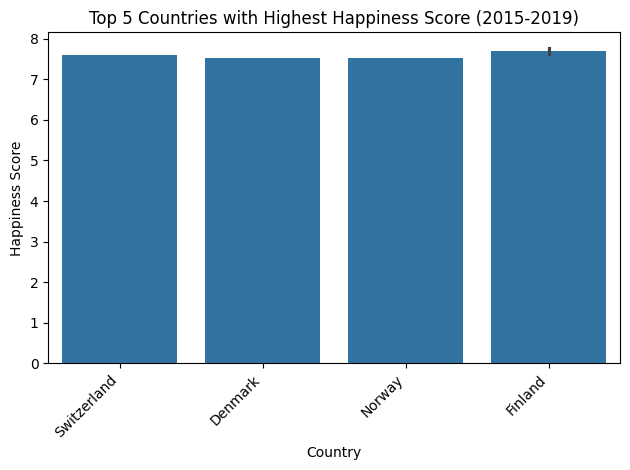

In [432]:
sns.barplot(data=first_index_each_year.head(5), x='Country', y='Score')

plt.title('Top 5 Countries with Highest Happiness Score (2015-2019)')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

In [433]:

sns.barplot(data=df_2015.head(10), x='Country', y='Score')

plt.title('Top 10 Countries with Highest Happiness Score (2015)')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

ValueError: Could not interpret value `Score` for `y`. An entry with this name does not appear in `data`.

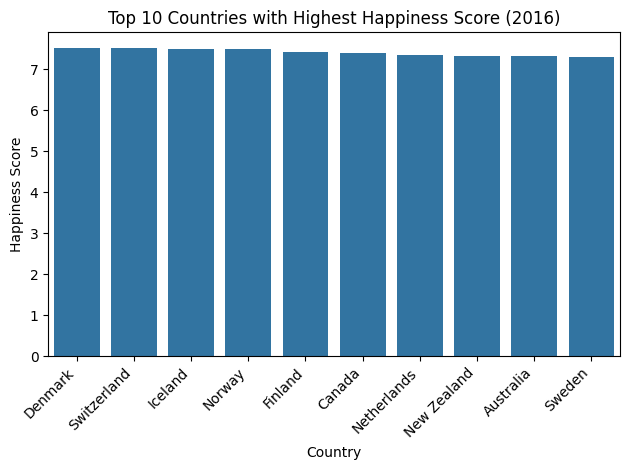

In [ ]:

sns.barplot(data=df_2016.head(10), x='Country', y='Score')

plt.title('Top 10 Countries with Highest Happiness Score (2016)')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

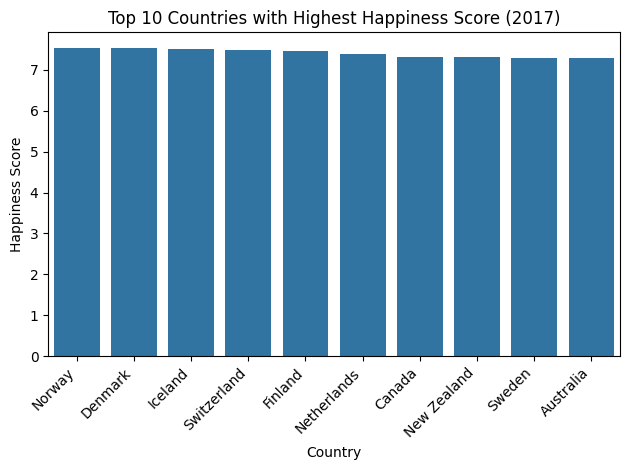

In [ ]:

sns.barplot(data=df_2017.head(10), x='Country', y='Score')

plt.title('Top 10 Countries with Highest Happiness Score (2017)')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

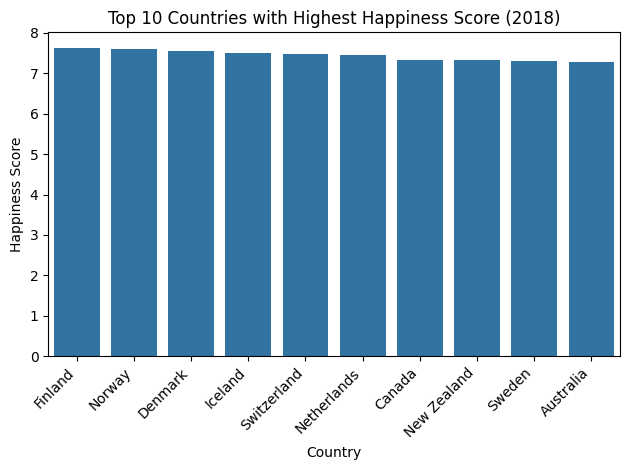

In [ ]:

sns.barplot(data=df_2018.head(10), x='Country or region', y='Score')

plt.title('Top 10 Countries with Highest Happiness Score (2018)')
plt.xlabel('Country')
plt.ylabel('Happiness Score')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

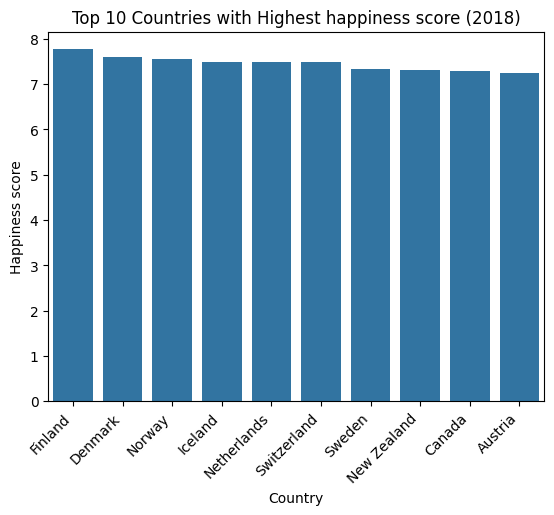

In [ ]:
sns.barplot(data=df_2019.head(10), x='Country or region', y='Score')

plt.title('Top 10 Countries with Highest happiness score (2018)')
plt.xlabel('Country')
plt.ylabel('Happiness score')

plt.xticks(rotation=45, ha='right')

plt.show()

,Country,Overall rank,Score,Standard Error,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Dystopia.Residual,Country or region
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,NaN,NaN


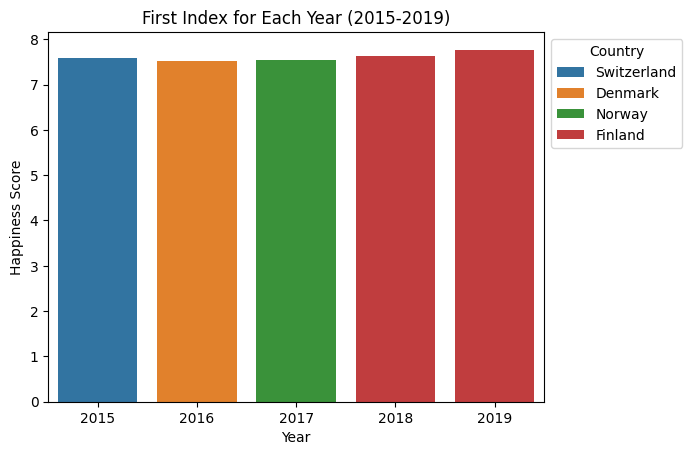

In [ ]:
sns.barplot(data=first_index_each_year, x='Year', y='Score', hue='Country')

plt.title('First Index for Each Year (2015-2019)')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


In [ ]:
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption']

# Create a dictionary to store the highest ranking country for each factor
highest_ranking = {}

# Find the highest ranking country for each factor
for factor in factors:
    highest_ranking[factor] = df_AllYears.loc[df_AllYears[factor].idxmax(), ['Country or region', factor]]

# Display the results
print("Countries or regions with the highest ranking in overall happiness and each factor:")
for factor, data in highest_ranking.items():
    print(f"\nHighest in {factor}:")
    print(data)

Countries or regions with the highest ranking in overall happiness and each factor:

Highest in GDP per capita:
   Country or region  GDP per capita
19               NaN        1.427270
19               NaN        1.697520
19               NaN        1.252785
19               NaN        2.096000
19    Czech Republic        1.269000

Highest in Social support:
  Country or region  Social support
3               NaN        1.330950
3               NaN        1.126900
3               NaN        1.516912
3               NaN        1.644000
3           Iceland        1.624000

Highest in Healthy life expectancy:
   Country or region  Healthy life expectancy
33               NaN                 0.738500
33               NaN                 0.592670
33               NaN                 0.888961
33               NaN                 1.008000
33         Singapore                 1.141000

Highest in Freedom:
   Country or region   Freedom
43               NaN  0.658210
43               NaN  0.19

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

(158, 11)

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [ ]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [ ]:
df_all.head(5)

,Dystopia.Residual,Country,Overall rank,Score,Standard Error,GDP per capita,Social support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,outlier,z_outlier
0,NaN,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,False,False
1,NaN,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,False,False
2,NaN,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,False,False
3,NaN,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,False,False
4,NaN,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,False,False


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

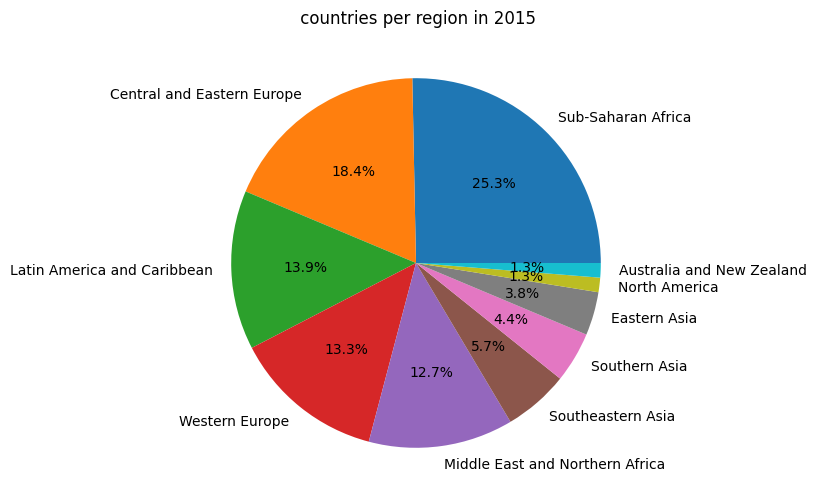

In [ ]:
df_2015['Region'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,6))
plt.title(' countries per region in 2015')
plt.axis('off')
plt.show()

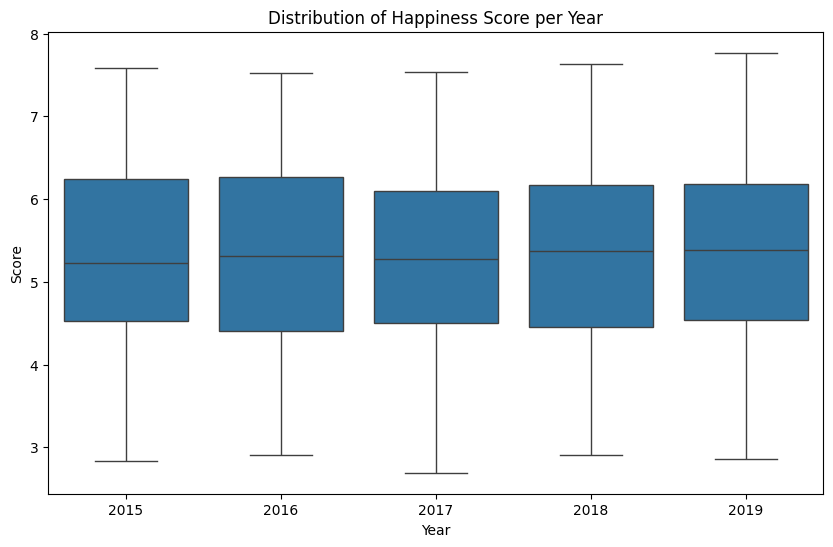

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Score', data=df_all)
plt.title('Distribution of Happiness Score per Year')
plt.show()

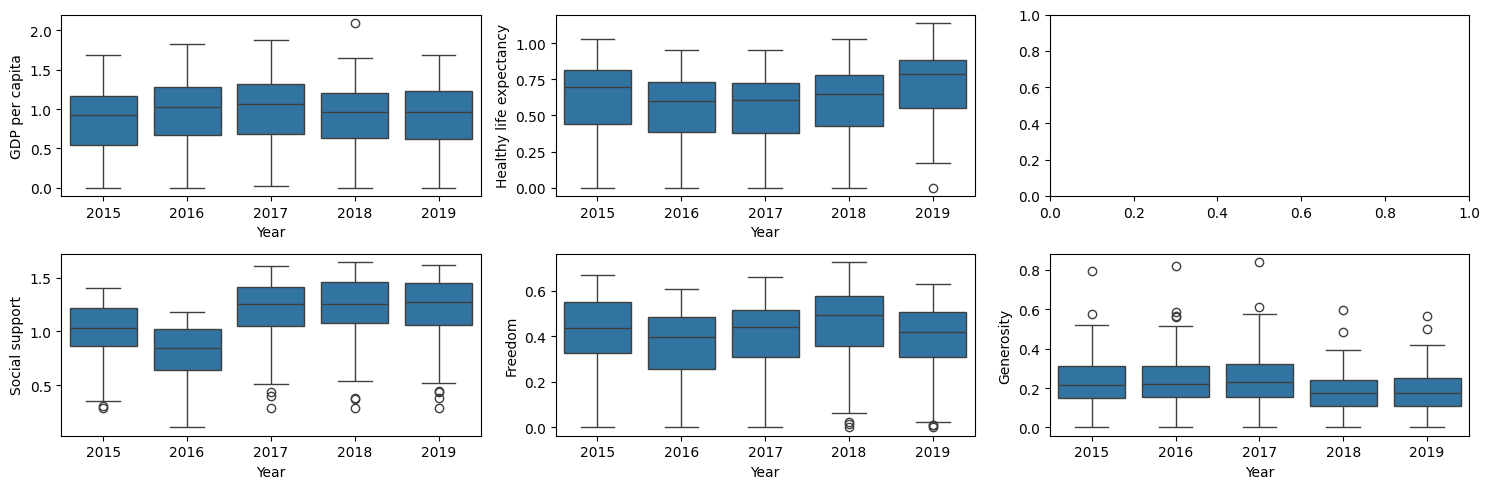

In [436]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

sns.boxplot(x='Year', y='GDP per capita', data=df_all, ax=axes[0, 0])
sns.boxplot(x='Year', y='Healthy life expectancy', data=df_all, ax=axes[0, 1])
#sns.boxplot(x='Year', y='Perceptions of corruption', data=df_all, ax=axes[0, 2])
sns.boxplot(x='Year', y='Social support', data=df_all, ax=axes[1, 0])
sns.boxplot(x='Year', y='Freedom', data=df_all, ax=axes[1, 1])
sns.boxplot(x='Year', y='Generosity', data=df_all, ax=axes[1, 2])
plt.tight_layout()
plt.show()

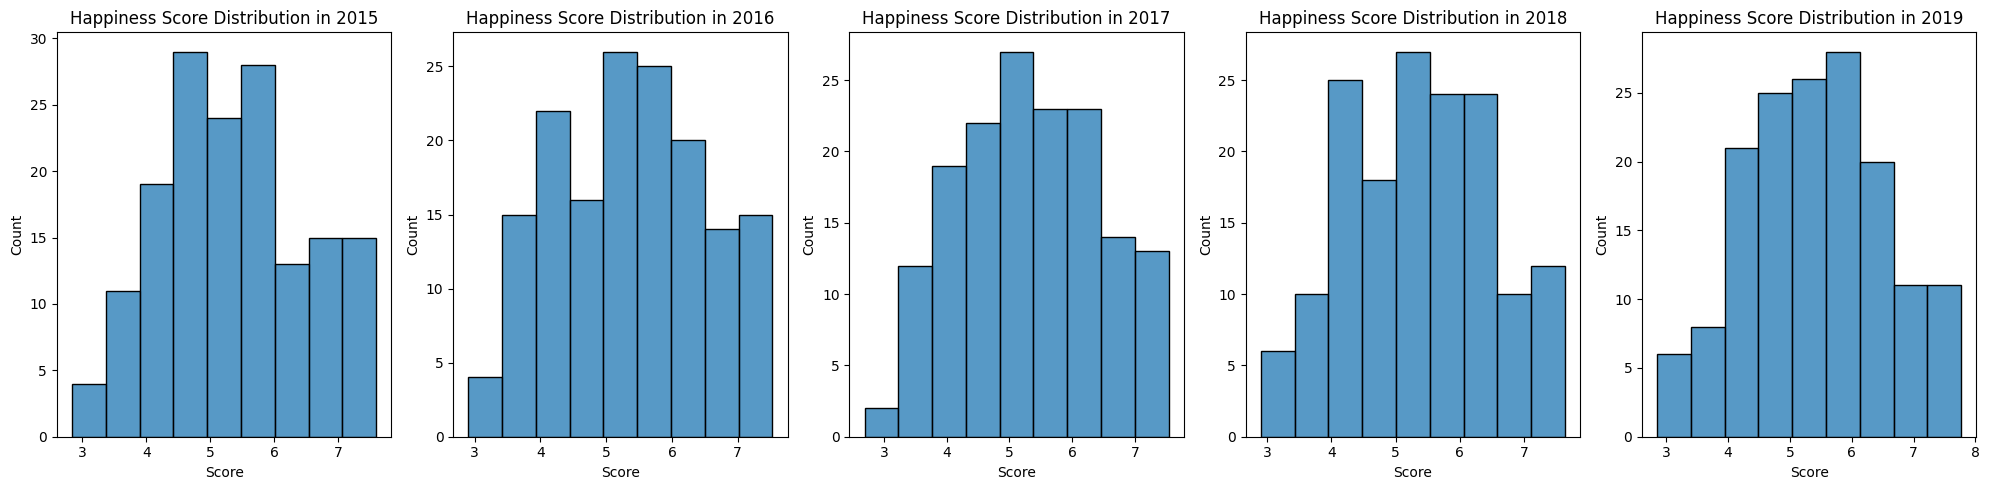

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, year in enumerate(df_all['Year'].unique()):
    sns.histplot(df_all[df_all['Year'] == year]['Score'], ax=axes[i])
    axes[i].set_title(f'Happiness Score Distribution in {year}')
plt.tight_layout()
plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

In [447]:
corr_matrix = df_all.select_dtypes(include=np.number).drop(columns='Year').corr()
corr_matrix

,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity
GDP per capita,1.000000,0.573099,0.778796,0.338615,-0.012449
Social support,0.573099,1.000000,0.557558,0.423306,-0.034648
Healthy life expectancy,0.778796,0.557558,1.000000,0.339176,0.013179
Freedom,0.338615,0.423306,0.339176,1.000000,0.292038
Generosity,-0.012449,-0.034648,0.013179,0.292038,1.000000


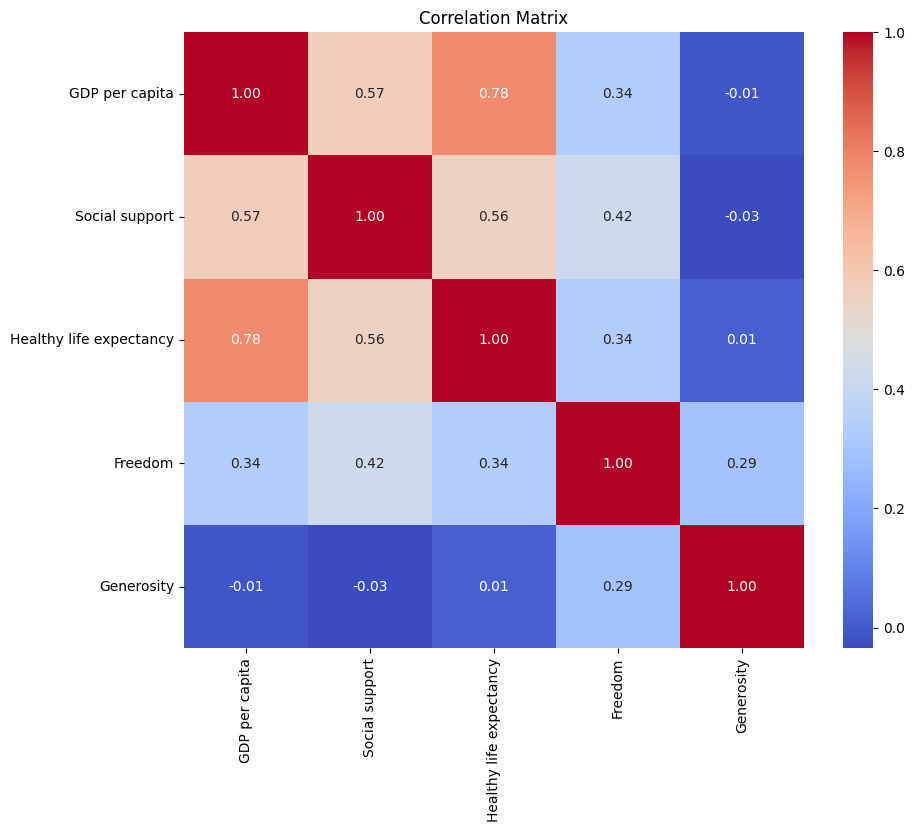

In [448]:
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.